In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import mode
from sklearn.preprocessing import normalize, OneHotEncoder
import matplotlib.pyplot as plt

In [25]:
def Analyze_accuracy_and_plot_dendrogram(X, y):
    # KMeans Clustering 
    k = 3
    kmeans = KMeans(n_clusters = 3)
    clusters = kmeans.fit_predict(X)
    
    labels = np.zeros_like(clusters)
    for i in range(k):
        cat = (clusters == i)
        labels[cat] = mode(y[cat])[0]
    kmeans_accuracy = accuracy_score(y, labels)
    print(f"KMeans Clustering accuracy score : {kmeans_accuracy}\n")
    
    # Agglomerative Clustering
    # ward linkage
    ward = AgglomerativeClustering(n_clusters = 3)
    ward_pred = ward.fit_predict(X)

    # complete linkage 
    complete = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
    complete_pred = complete.fit_predict(X)

    # avg linkage 
    avg = AgglomerativeClustering(n_clusters = 3, linkage = "avg")
    avg_pred = avg.fit_predict(X)
    
    ward_rand_score = adjusted_rand_score(y, ward_pred)
    complete_rand_score = adjusted_rand_score(y, complete_pred)
    avg_rand_score = adjusted_rand_score(y, avg_pred)

    print(f"Agglomerative Clustering Scores : \n\tWard : {ward_rand_score}\n\tComplete : {complete_rand_score}\n\tAverage : {avg_rand_score}")

    # normalizing the iris data
    normalized_X = normalize(X)
    
    linkage_type = "ward"
    linkage_matrix = linkage(normalized_X, linkage_type)

    plt.figure(figsize = (22, 18))

    # dedrogram is directly using plt
    dendrogram(linkage_matrix)

    plt.show()

In [26]:
iris = load_iris()
Analyze_accuracy_and_plot_dendrogram(iris.data, iris.target)

KMeans Clustering accuracy score : 0.8933333333333333



ValueError: Unknown linkage type avg. Valid options are dict_keys(['ward', 'complete', 'average', 'single'])

KMeans Clustering accuracy score : 0.6588541666666666

Agglomerative Clustering Scores : 
	Ward : 0.10145862464761295
	Complete : 0.03506073932997468
	Average : 0.03506073932997468


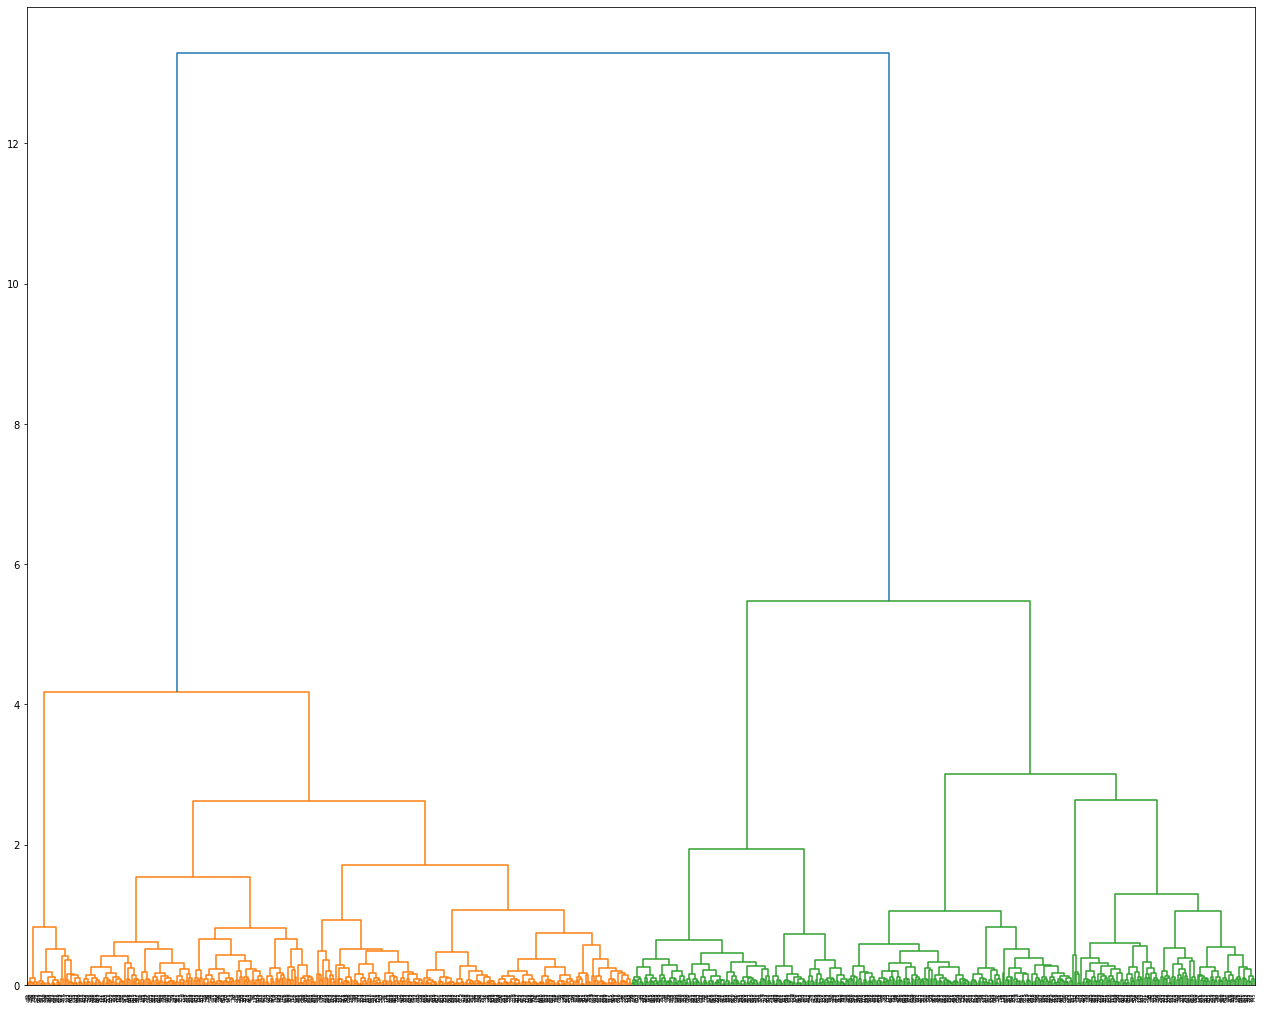

In [ ]:
diabetes = pd.read_csv("../csv_datasets/diabetes.csv")

y = diabetes.Outcome
X = diabetes.drop("Outcome", axis = 1)

Analyze_accuracy_and_plot_dendrogram(X, y)

In [ ]:
strokes = pd.read_csv("../csv_datasets/dastrokes.csv")
strokes_processed = pd.get_dummies(strokes, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

y = strokes_processed['stroke']
X = strokes_processed.drop(['stroke', 'bmi'], axis = 1)

Analyze_accuracy_and_plot_dendrogram(X, y)

FileNotFoundError: [Errno 2] No such file or directory: '../csv_datasets/dastrokes.csv'